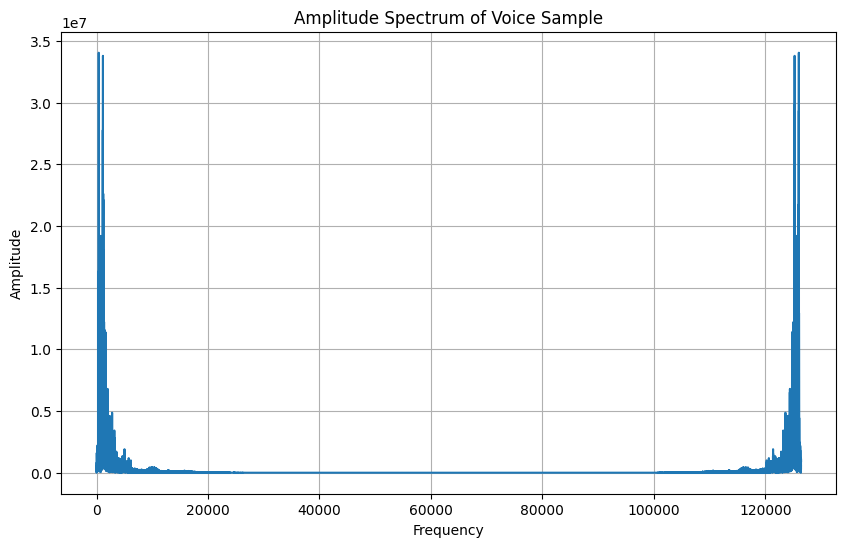

In [ ]:
#A1
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

sample_rate, voice_sample = wavfile.read('1.wav')

if len(voice_sample.shape) > 1:
    voice_sample = voice_sample[:, 0]

fft_result = np.fft.fft(voice_sample)

amplitude_spectrum = np.abs(fft_result)

# Plot the amplitude spectrum
plt.figure(figsize=(10, 6))
plt.plot(amplitude_spectrum)
plt.title('Amplitude Spectrum of Voice Sample')
plt.xlabel('Frequency')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


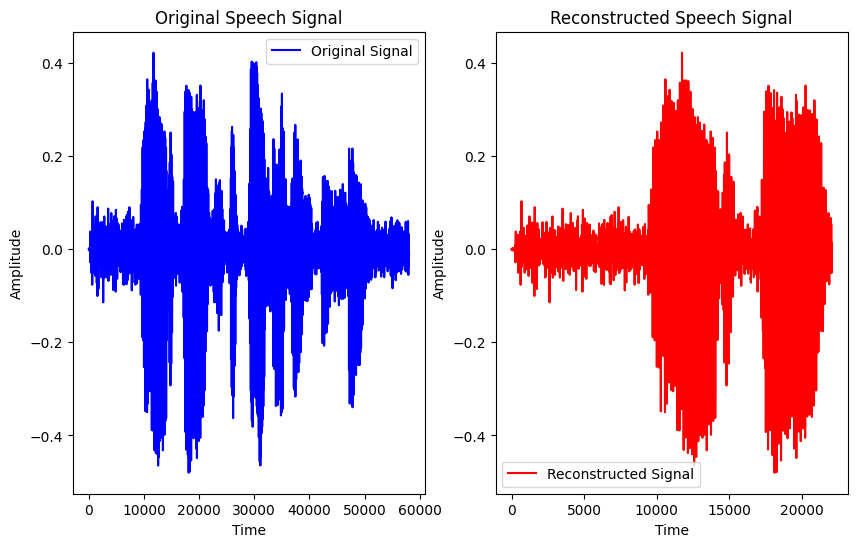

In [ ]:
#A2
import librosa
(y,sr)= librosa.load('1.wav')
speech_fft = np.fft.fft(y, sr)

reconstructed_signal = np.fft.ifft(speech_fft)
plt.figure(figsize=(10, 6))

# Plot original signal
plt.subplot(1, 2, 1)
plt.plot(y, color='blue', label='Original Signal')
plt.title('Original Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

# Plot reconstructed signal
plt.subplot(1, 2, 2)
plt.plot(np.real(reconstructed_signal), color='red', label='Reconstructed Signal')
plt.title('Reconstructed Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()

<ipython-input-21-186d50ad2aa5>:30: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies, 10 * np.log10(psd_data))
<ipython-input-21-186d50ad2aa5>:37: RuntimeWarning: divide by zero encountered in log10
  plt.plot(frequencies_word, 10 * np.log10(psd_word_data))


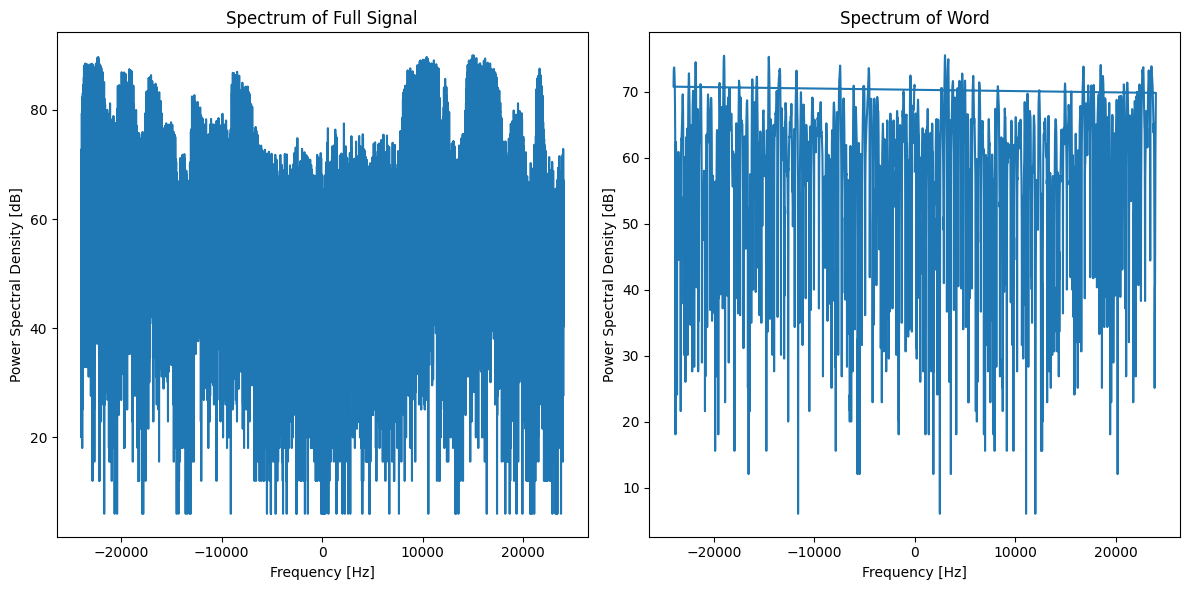

In [ ]:
#A3
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

sample_rate, data = wavfile.read('1.wav')

start_index = 10000
end_index = 20000
word_data = data[start_index:end_index]

fft_data = np.fft.fft(data)
fft_word_data = np.fft.fft(word_data)

psd_data = np.abs(fft_data) ** 2
psd_word_data = np.abs(fft_word_data) ** 2

# Plot the power spectral density of the full signal and the word
frequencies = np.fft.fftfreq(len(data), 1/sample_rate)
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.title('Spectrum of Full Signal')
plt.plot(frequencies, 10 * np.log10(psd_data))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [dB]')

frequencies_word = np.fft.fftfreq(len(word_data), 1/sample_rate)
plt.subplot(1, 2, 2)
plt.title('Spectrum of Word')
plt.plot(frequencies_word, 10 * np.log10(psd_word_data))
plt.xlabel('Frequency [Hz]')
plt.ylabel('Power Spectral Density [dB]')

plt.tight_layout()
plt.show()


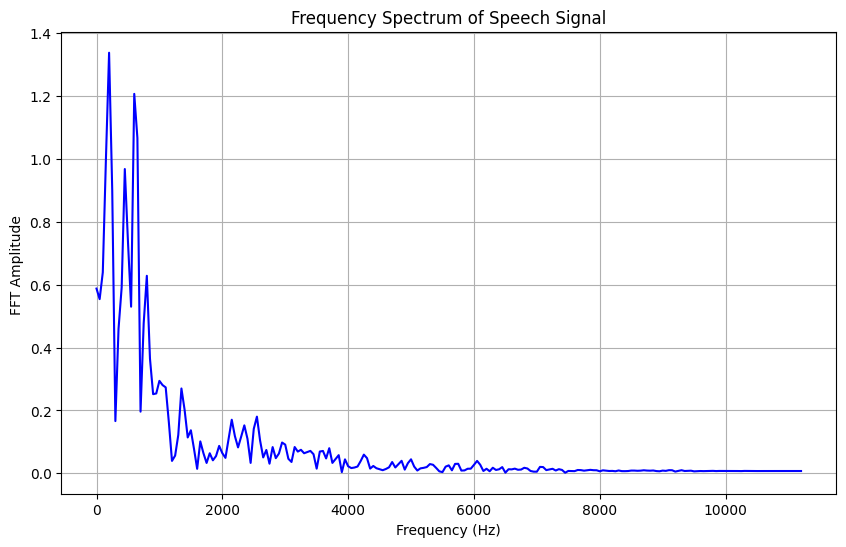

In [24]:
#A4
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft
sr=22500
window_duration = 0.02
window_samples = int(window_duration * sr)
windowed_signal = y[:window_samples]
X = fft(windowed_signal)
n_oneside = window_samples // 2
frequencies = np.arange(n_oneside) * (sr / window_samples)
spectrum = np.abs(X[:n_oneside])
plt.figure(figsize=(10, 6))
plt.plot(frequencies, spectrum, 'b')
plt.xlabel('Frequency (Hz)')
plt.ylabel('FFT Amplitude ')
plt.title('Frequency Spectrum of Speech Signal')
plt.grid(True)
plt.show()

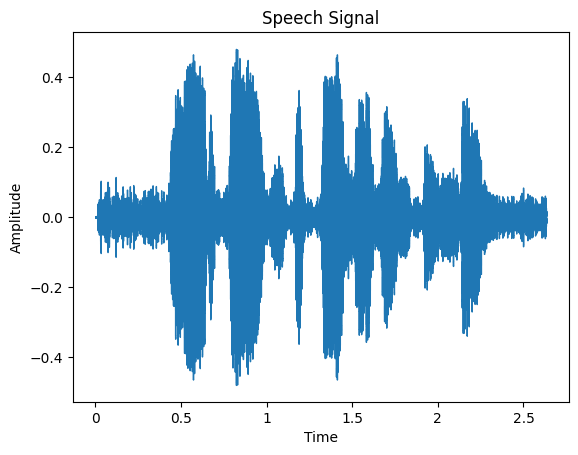

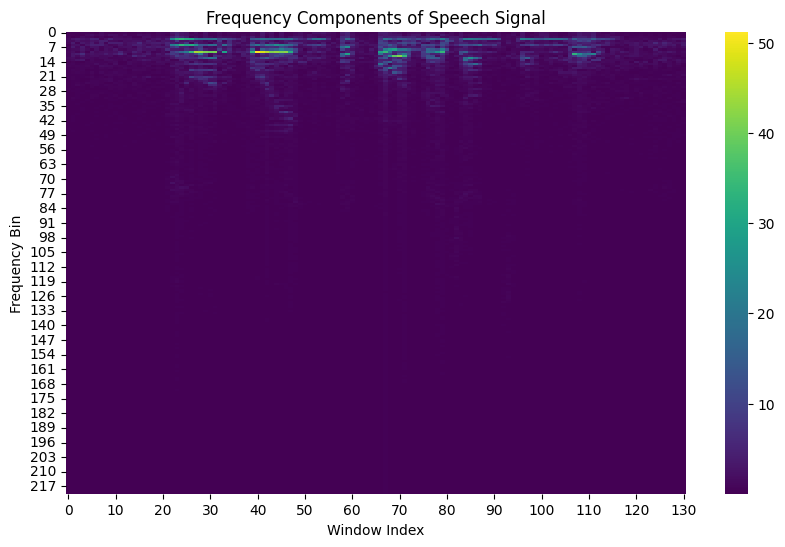

In [25]:
#A5
import seaborn as sns
y, sr = librosa.load(r"1.wav")
librosa.display.waveshow(y, sr=sr)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()
window_length_sec = 0.02
window_length = int(window_length_sec * sr)
num_windows = len(y) // window_length
freq_matrix = np.zeros((num_windows, window_length // 2 + 1))
for i in range(num_windows):
    window = y[i * window_length: (i + 1) * window_length]
    fft_result = np.fft.rfft(window)
    freq_matrix[i, :] = np.abs(fft_result)

# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(freq_matrix.T, cmap='viridis', xticklabels=10)
plt.title('Frequency Components of Speech Signal')
plt.xlabel('Window Index')
plt.ylabel('Frequency Bin')
plt.show()

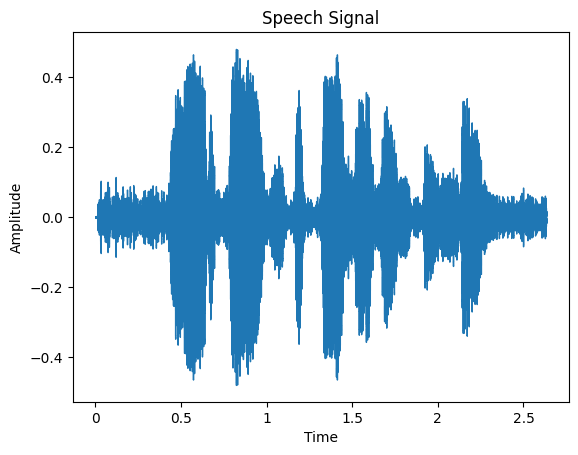

<ipython-input-26-b201d0554c0f>:10: RuntimeWarning: divide by zero encountered in log10
  plt.pcolormesh(t, f, 10 * np.log10(Sxx))


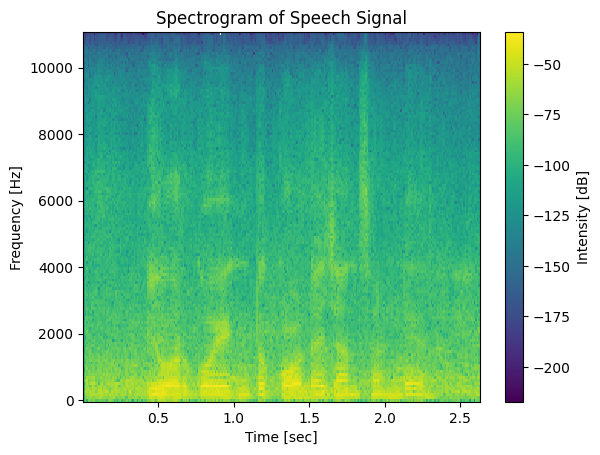

In [26]:
#A6
from scipy.signal import spectrogram

librosa.display.waveshow(y)
plt.title('Speech Signal')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()

f, t, Sxx = spectrogram(y, sr)
plt.pcolormesh(t, f, 10 * np.log10(Sxx))
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.title('Spectrogram of Speech Signal')
plt.colorbar(label='Intensity [dB]')
plt.show()